# Modeling

In [98]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [99]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [100]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post ...,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just...,no_text,593,39723,0.98,1


In [101]:
plants.shape

(9271, 8)

In [102]:
X = plants['title']
y = plants['subreddit']

In [103]:
X.shape

(9271,)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [105]:
X_train.shape

(6953,)

In [106]:
cvec = CountVectorizer(stop_words='english')

In [107]:
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [108]:
X_train = cvec.transform(X_train)

In [109]:
X_test = cvec.transform(X_test)

In [110]:
X_train.shape

(6953, 6205)

In [111]:
X_test.shape

(2318, 6205)

In [112]:
cvec.get_feature_names_out()

array(['00', '000', '00pm', ..., 'zuccini', 'zuchini', 'zz'], dtype=object)

In [113]:
X_train

<6953x6205 sparse matrix of type '<class 'numpy.int64'>'
	with 34215 stored elements in Compressed Sparse Row format>

In [114]:
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [115]:
X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names_out())

In [116]:
X_train_df.head()

,00,000,00pm,10,100,1000l,1000w,100lbs,1030pm,10a,...,zinnias,zombie,zone,zone7b,zone8a,zoom,zucchini,zuccini,zuchini,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

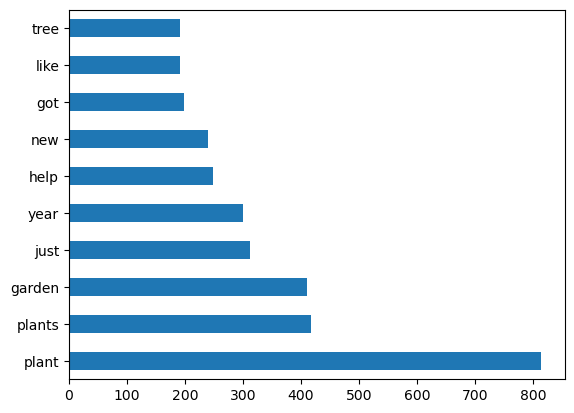

In [117]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')

In [118]:
y_test.value_counts(normalize = True)

subreddit
1    0.503883
0    0.496117
Name: proportion, dtype: float64

In [119]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [120]:
log_reg.score(X_train, y_train)

0.9375809003307924

In [121]:
log_reg.score(X_test, y_test)

0.8356341673856773

In [123]:
1 - y.mean()

0.4891597454427785